### All India General CPI (Base 2012 =100) Since January 2013

Product: CPI

Category: Price Statistics

Geography: All India, Rural, Urban, States

Frequency: Monthly

Reference Period: Oct 2025

Data Source: Price Statistics Division, MoSPI

Description: Consumer Price Index (CPI) measures the changes over time in general level of retail prices of selected goods and services that households purchase for the purpose of consumption. Such changes affect the real purchasing power of consumers‘ income and their welfare. CPI numbers are widely used as macroeconomic indicator of inflation, and also as a tool by government and central banks for targeting inflation and monitoring price stability. All India Consumer price Indices are shown here for Food & Beverages, Clothing & Footwear, Housing, Fuel & Light and Misc for Rural and urban Areas in India.

Release Date: 12 Nov 2025

Table No. CPIMCY25006OCT



Reference Link: https://esankhyiki.mospi.gov.in/catalogue-main/catalogue?page=0&search=&product=CPI

### Data Preprocessing 

In [61]:
import pandas as pd


In [62]:
df = pd.read_excel("Dataset.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Annex-VI
0,Time Series Data for All India General CPI (Ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,2013,104.6,105.3,105.5,106.1,106.9,109.3,111,112.4,113.7,114.8,116.3,114.5
3,2014,113.6,113.6,114.2,115.1,115.8,116.7,119.2,120.3,120.1,120.1,120.1,119.4
4,2015,119.5,119.7,120.2,120.7,121.6,123,123.6,124.8,125.4,126.1,126.6,126.1


In [63]:
import pandas as pd

df = pd.read_excel('Dataset.xlsx', sheet_name='Sheet1', header=2)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

month_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for col in month_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].astype(str).str.replace('*', '', regex=False).astype(float))


# Display the first few rows of the clean DataFrame
print(df.head())
print(df.dtypes)

   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
0  2013  104.6  105.3  105.5  106.1  106.9  109.3  111.0  112.4  113.7  114.8   
1  2014  113.6  113.6  114.2  115.1  115.8  116.7  119.2  120.3  120.1  120.1   
2  2015  119.5  119.7  120.2  120.7  121.6  123.0  123.6  124.8  125.4  126.1   
3  2016  126.3  126.0  126.0  127.3  128.6  130.1  131.1  131.1  130.9  131.4   
4  2017  130.3  130.6  130.9  131.1  131.4  132.0  134.2  135.4  135.2  136.1   

     Nov    Dec  
0  116.3  114.5  
1  120.1  119.4  
2  126.6  126.1  
3  131.2  130.4  
4  137.6  137.2  
Year     object
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object


In [64]:
df.head

<bound method NDFrame.head of         Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0       2013  104.6  105.3  105.5  106.1  106.9  109.3  111.0  112.4  113.7   
1       2014  113.6  113.6  114.2  115.1  115.8  116.7  119.2  120.3  120.1   
2       2015  119.5  119.7  120.2  120.7  121.6  123.0  123.6  124.8  125.4   
3       2016  126.3  126.0  126.0  127.3  128.6  130.1  131.1  131.1  130.9   
4       2017  130.3  130.6  130.9  131.1  131.4  132.0  134.2  135.4  135.2   
5       2018  136.9  136.4  136.5  137.1  137.8  138.5  139.8  140.4  140.2   
6       2019  139.6  139.9  140.4  141.2  142.0  142.9  144.2  145.0  145.8   
7       2020  150.2  149.1  148.6  151.4  150.9  151.8  153.9  154.7  156.4   
8       2021  156.3  156.6  156.8  157.8  160.4  161.3  162.5  162.9  163.2   
9       2022  165.7  166.1  167.7  170.1  171.7  172.6  173.4  174.3  175.3   
10      2023  176.5  176.8  177.2  178.1  179.1  181.0  186.3  186.2  184.1   
11      2024  185.5  1

In [65]:
import pandas as pd

# Load your file

# Drop rows where Year is NaN or contains "Notes"
df = df[df['Year'].apply(lambda x: str(x).isdigit())]

# Convert Year to int
df['Year'] = df['Year'].astype(int)

# Set up month order
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Melt into long format
df_melted = df.melt(id_vars="Year", value_vars=months,
                    var_name="Month", value_name="CPI")

# Drop NaN CPI values
df_melted = df_melted.dropna(subset=["CPI"])

# Convert to proper datetime index
df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + "-" + df_melted['Month'], format="%Y-%b")

df_melted = df_melted.sort_values("Date")

# Final time series
ts = df_melted.set_index("Date")["CPI"]

ts.head(), ts.tail()


(Date
 2013-01-01    104.6
 2013-02-01    105.3
 2013-03-01    105.5
 2013-04-01    106.1
 2013-05-01    106.9
 Name: CPI, dtype: float64,
 Date
 2025-05-01    193.0
 2025-06-01    194.2
 2025-07-01    196.1
 2025-08-01    197.0
 2025-09-01    197.0
 Name: CPI, dtype: float64)

Final Table

In [66]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,104.6,105.3,105.5,106.1,106.9,109.3,111.0,112.4,113.7,114.8,116.3,114.5
1,2014,113.6,113.6,114.2,115.1,115.8,116.7,119.2,120.3,120.1,120.1,120.1,119.4
2,2015,119.5,119.7,120.2,120.7,121.6,123.0,123.6,124.8,125.4,126.1,126.6,126.1
3,2016,126.3,126.0,126.0,127.3,128.6,130.1,131.1,131.1,130.9,131.4,131.2,130.4
4,2017,130.3,130.6,130.9,131.1,131.4,132.0,134.2,135.4,135.2,136.1,137.6,137.2
5,2018,136.9,136.4,136.5,137.1,137.8,138.5,139.8,140.4,140.2,140.7,140.8,140.1
6,2019,139.6,139.9,140.4,141.2,142.0,142.9,144.2,145.0,145.8,147.2,148.6,150.4
7,2020,150.2,149.1,148.6,151.4,150.9,151.8,153.9,154.7,156.4,158.4,158.9,157.3
8,2021,156.3,156.6,156.8,157.8,160.4,161.3,162.5,162.9,163.2,165.5,166.7,166.2
9,2022,165.7,166.1,167.7,170.1,171.7,172.6,173.4,174.3,175.3,176.7,176.5,175.7


### Phase - I

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")

**Converting the DataFrame to Time Series**

In [68]:
df_melt = df.melt(id_vars='Year', var_name='Month', value_name='CPI')
df_melt['Date'] = pd.to_datetime(df_melt['Year'].astype(str) + "-" + df_melt['Month'])
df_melt = df_melt.sort_values("Date")

ts = df_melt.set_index("Date")['CPI']
ts.head()


Date
2013-01-01    104.6
2013-02-01    105.3
2013-03-01    105.5
2013-04-01    106.1
2013-05-01    106.9
Name: CPI, dtype: float64

In [69]:
ts = ts.dropna()   # removes the months with NaN at the end
print(ts.tail())


Date
2025-05-01    193.0
2025-06-01    194.2
2025-07-01    196.1
2025-08-01    197.0
2025-09-01    197.0
Name: CPI, dtype: float64


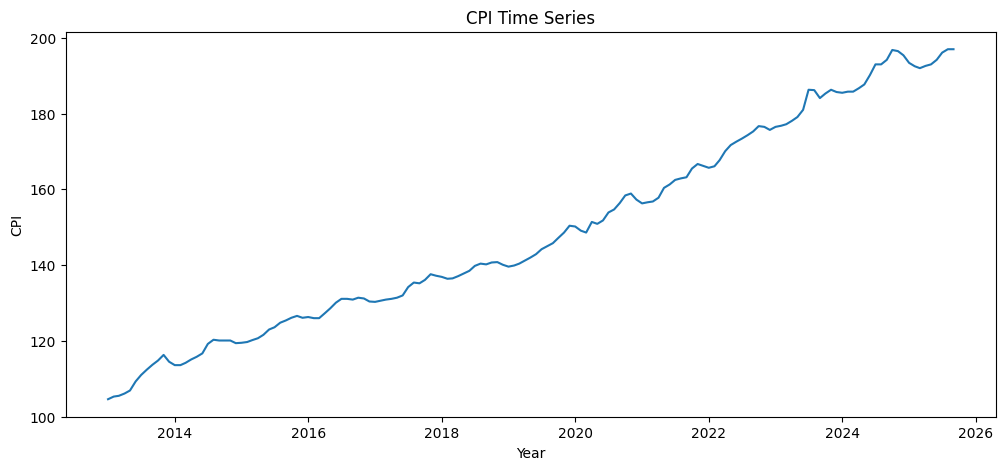

In [70]:
plt.figure(figsize=(12,5))
plt.plot(ts)
plt.title("CPI Time Series")
plt.xlabel("Year")
plt.ylabel("CPI")
plt.show()


Plotting Variance

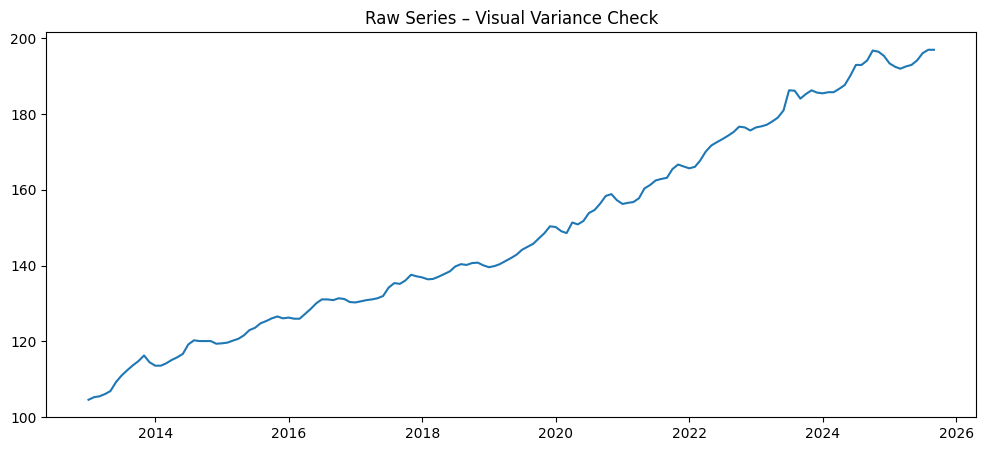

Variance of series: 723.2567182662539


In [71]:
plt.figure(figsize=(12,5))
plt.plot(ts)
plt.title("Raw Series – Visual Variance Check")
plt.show()

print("Variance of series:", ts.var())


**Percentage Change**

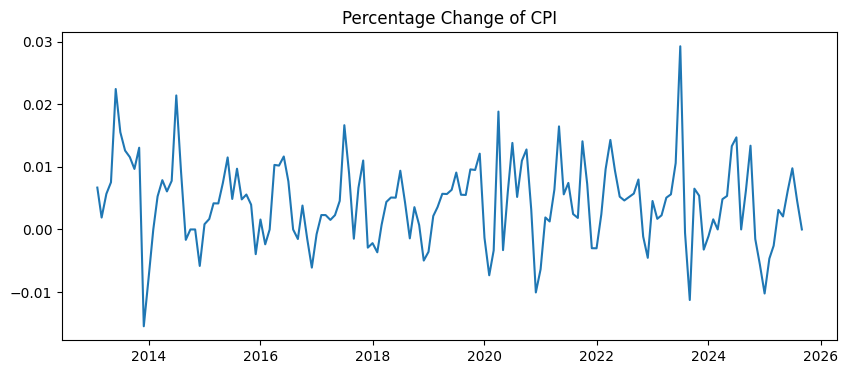

In [72]:
plt.figure(figsize=(10,4))
plt.plot(ts.pct_change())
plt.title("Percentage Change of CPI")
plt.show()


**STL Decomposition**

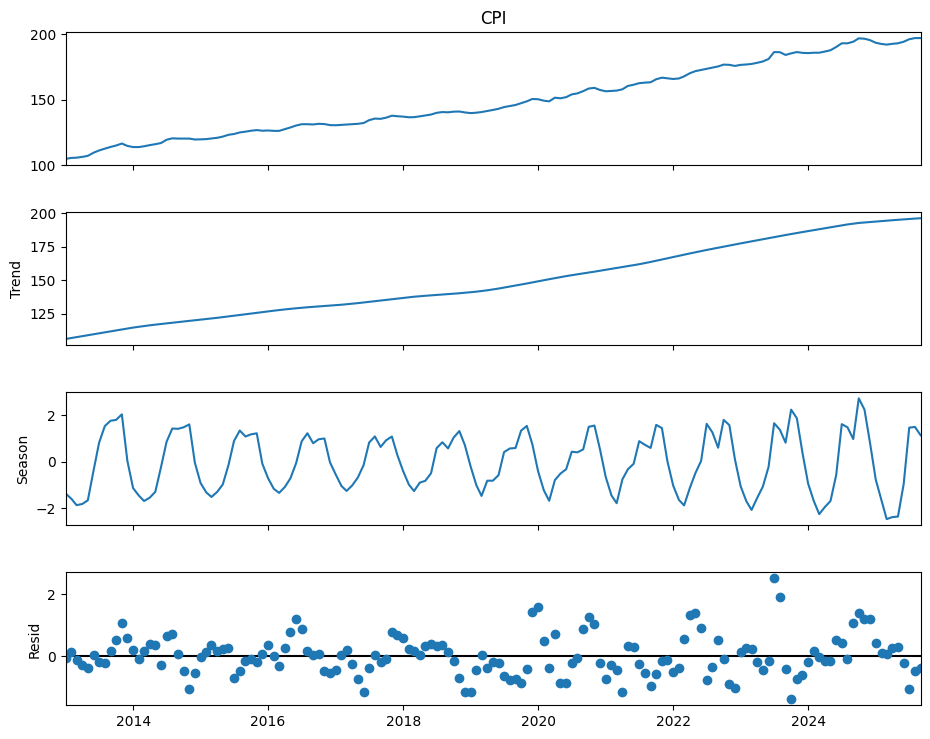

In [73]:
stl = STL(ts, period=12).fit()
fig = stl.plot()
fig.set_size_inches(10,8)
plt.show()

trend = stl.trend
seasonal = stl.seasonal
irregular = stl.resid


**Classical Additive Decomposition**

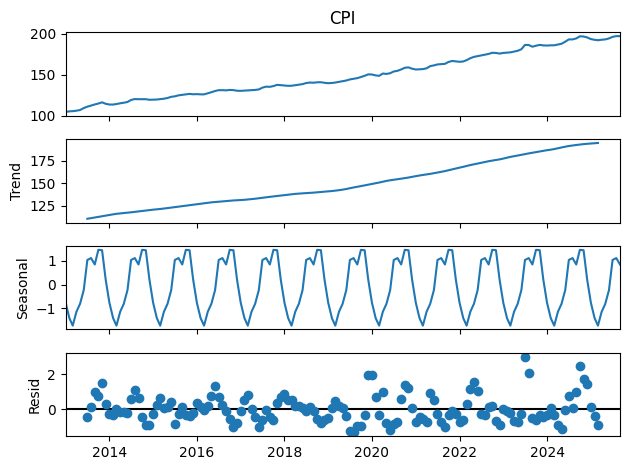

In [74]:
decomp = seasonal_decompose(ts, model='additive', period=12)
decomp.plot()
plt.show()


**Plot Irregular Component**

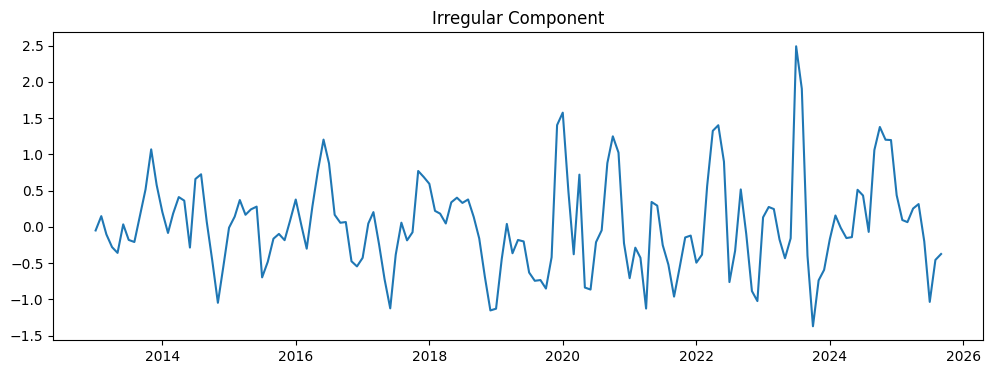

In [75]:
plt.figure(figsize=(12,4))
plt.plot(irregular)
plt.title("Irregular Component")
plt.show()


**ACF of Irregular Component**

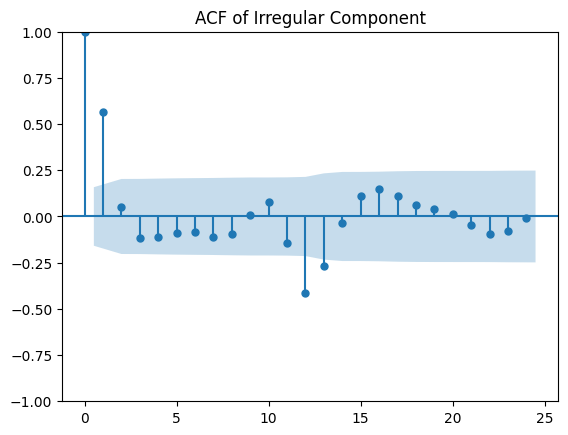

In [76]:
plot_acf(irregular.dropna(), lags=24)
plt.title("ACF of Irregular Component")
plt.show()


**Ljung-Box Test**

In [77]:
ljung = acorr_ljungbox(irregular.dropna(), lags=[12], return_df=True)
ljung


,lb_stat,lb_pvalue
12,93.829106,8.920606e-15


**ADF Test**

In [78]:
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(ts)


ADF Statistic: 1.1135090472805327
p-value: 0.9953302836080994


**KPSS Test**

In [79]:
def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])

kpss_test(ts)


KPSS Statistic: 1.7794235580281992
p-value: 0.01


**Log Transformation**

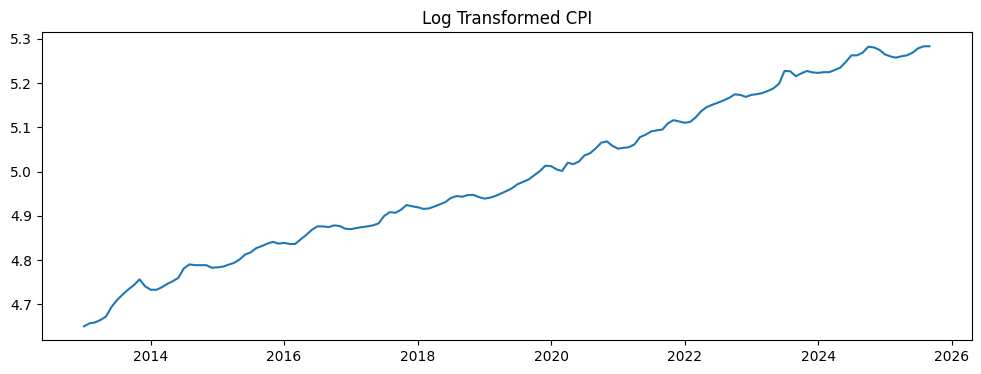

ADF after log:
ADF Statistic: -0.8376494293148092
p-value: 0.8078119678944664

KPSS after log:
KPSS Statistic: 1.797175749316116
p-value: 0.01


In [80]:
ts_log = np.log(ts)

plt.figure(figsize=(12,4))
plt.plot(ts_log)
plt.title("Log Transformed CPI")
plt.show()

print("ADF after log:")
adf_test(ts_log)

print("\nKPSS after log:")
kpss_test(ts_log)


### Phase - II

**Train-Test-Split**

In [81]:
import numpy as np
import pandas as pd

ts_log = ts.dropna()          # original CPI values
ts_log = ts.astype(float)
train = ts_log[:-12]     # until Dec 2023
test  = ts_log[-12:]     # year 2024 or 2025 depending on dataset



#### **ARIMA**

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(p, d=1, q)
p, d, q = 1, 1, 1   # you can tune later

model_arima = ARIMA(ts_log, order=(p, d, q))
arima_res = model_arima.fit()

print(arima_res.summary())


                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  153
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -214.949
Date:                Sun, 23 Nov 2025   AIC                            435.899
Time:                        19:10:26   BIC                            444.971
Sample:                    01-01-2013   HQIC                           439.584
                         - 09-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1235      0.109      1.131      0.258      -0.091       0.337
ma.L1          0.5152      0.108      4.764      0.000       0.303       0.727
sigma2         0.9875      0.077     12.785      0.0

In [83]:
n_forecast = 12
arima_forecast = arima_res.forecast(steps=n_forecast)

# Convert log forecast → actual scale
arima_forecast_actual = np.exp(arima_forecast)

pd.DataFrame({
    "Actual": test.values,
    "Forecast_ARIMA": arima_forecast_actual.values
})


,Actual,Forecast_ARIMA
0,196.8,3.318509e+85
1,196.5,3.285582e+85
2,195.4,3.281538e+85
3,193.4,3.281039e+85
4,192.5,3.280977e+85
5,192.0,3.280970e+85
6,192.6,3.280969e+85
7,193.0,3.280969e+85
8,194.2,3.280969e+85
9,196.1,3.280969e+85


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, arima_forecast_actual)
rmse = np.sqrt(mean_squared_error(test, arima_forecast_actual))

print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)


ARIMA MAE: 3.284535669774613e+85
ARIMA RMSE: 3.284551884528546e+85


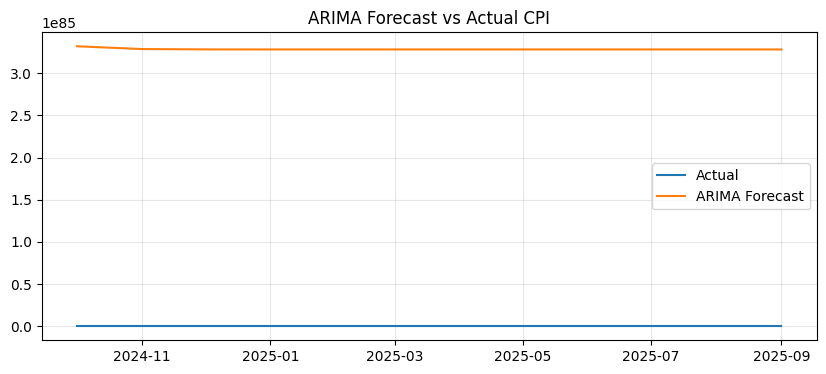

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, arima_forecast_actual, label="ARIMA Forecast")
plt.title("ARIMA Forecast vs Actual CPI")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### **SARIMA**

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,12)
model_sarima = SARIMAX(ts_log, 
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12))

sarima_res = model_sarima.fit()
print(sarima_res.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                CPI   No. Observations:                  153
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -170.474
Date:                            Sun, 23 Nov 2025   AIC                            350.947
Time:                                    19:10:27   BIC                            365.655
Sample:                                01-01-2013   HQIC                           356.924
                                     - 09-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2817      0.231     -1.218      0.223      -0.735       0.172
ma.L1          0.5814      0.205   

In [87]:
sarima_fc = sarima_res.forecast(steps=12)
sarima_fc_actual = np.exp(sarima_fc)


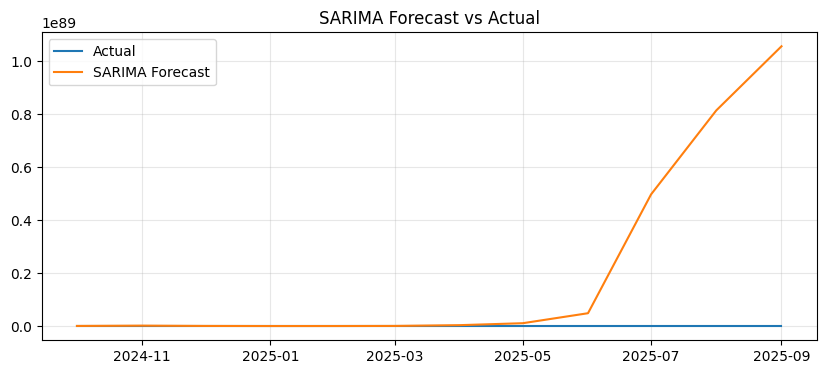

In [88]:
plt.figure(figsize=(10,4))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, sarima_fc_actual, label="SARIMA Forecast")
plt.title("SARIMA Forecast vs Actual")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### HOLT WINTERS SMOOTHING

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(
    ts,
    trend="add",
    seasonal="add",
    seasonal_periods=12
).fit()

hw_fc = hw_model.forecast(12)


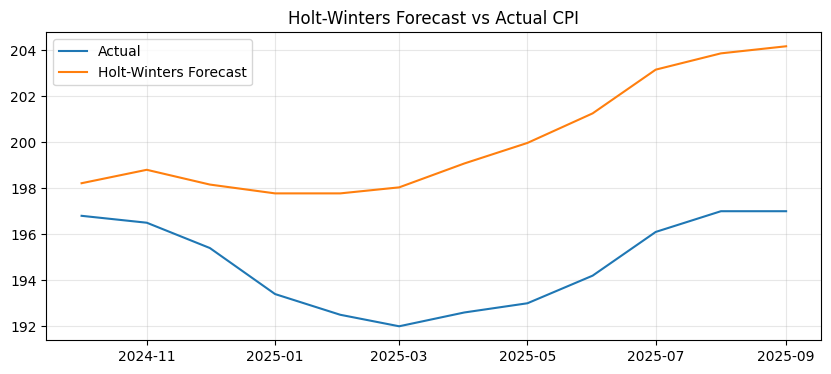

In [90]:
plt.figure(figsize=(10,4))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, hw_fc, label="Holt-Winters Forecast")
plt.title("Holt-Winters Forecast vs Actual CPI")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
